<a href="https://colab.research.google.com/github/antonsysoev/ktmi_pm/blob/%D0%9F%D0%9C-19/%D0%BA_%D0%9B%D0%B5%D0%BA%D1%86%D0%B8%D0%B8_5_%D0%92%D0%BE%D1%81%D1%81%D1%82%D0%B0%D0%BD%D0%BE%D0%B2%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5_%D0%BF%D1%80%D0%BE%D0%BF%D1%83%D1%81%D0%BA%D0%BE%D0%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Восстановление пропущенных значений

In [1]:
%load_ext rpy2.ipython

In [2]:
%%R

install.packages("mice")


library(mice)

(as ‘lib’ is unspecified)














	‘/tmp/Rtmp64caWA/downloaded_packages’

Attaching package: ‘mice’



    filter



    cbind, rbind




In [3]:
%%R

data(airquality)
print(head(airquality))
print(summary(airquality))

print(sum(complete.cases(airquality)))

  Ozone Solar.R Wind Temp Month Day
1    41     190  7.4   67     5   1
2    36     118  8.0   72     5   2
3    12     149 12.6   74     5   3
4    18     313 11.5   62     5   4
5    NA      NA 14.3   56     5   5
6    28      NA 14.9   66     5   6
     Ozone           Solar.R           Wind             Temp      
 Min.   :  1.00   Min.   :  7.0   Min.   : 1.700   Min.   :56.00  
 1st Qu.: 18.00   1st Qu.:115.8   1st Qu.: 7.400   1st Qu.:72.00  
 Median : 31.50   Median :205.0   Median : 9.700   Median :79.00  
 Mean   : 42.13   Mean   :185.9   Mean   : 9.958   Mean   :77.88  
 3rd Qu.: 63.25   3rd Qu.:258.8   3rd Qu.:11.500   3rd Qu.:85.00  
 Max.   :168.00   Max.   :334.0   Max.   :20.700   Max.   :97.00  
 NA's   :37       NA's   :7                                       
     Month            Day      
 Min.   :5.000   Min.   : 1.0  
 1st Qu.:6.000   1st Qu.: 8.0  
 Median :7.000   Median :16.0  
 Mean   :6.993   Mean   :15.8  
 3rd Qu.:8.000   3rd Qu.:23.0  
 Max.   :9.000   Max

In [4]:
%%R

imp <- mice(airquality, m = 5)
airquality_imputed <- complete(imp)
print(head(airquality_imputed))
print(summary(airquality_imputed))


 iter imp variable
  1   1  Ozone  Solar.R
  1   2  Ozone  Solar.R
  1   3  Ozone  Solar.R
  1   4  Ozone  Solar.R
  1   5  Ozone  Solar.R
  2   1  Ozone  Solar.R
  2   2  Ozone  Solar.R
  2   3  Ozone  Solar.R
  2   4  Ozone  Solar.R
  2   5  Ozone  Solar.R
  3   1  Ozone  Solar.R
  3   2  Ozone  Solar.R
  3   3  Ozone  Solar.R
  3   4  Ozone  Solar.R
  3   5  Ozone  Solar.R
  4   1  Ozone  Solar.R
  4   2  Ozone  Solar.R
  4   3  Ozone  Solar.R
  4   4  Ozone  Solar.R
  4   5  Ozone  Solar.R
  5   1  Ozone  Solar.R
  5   2  Ozone  Solar.R
  5   3  Ozone  Solar.R
  5   4  Ozone  Solar.R
  5   5  Ozone  Solar.R
  Ozone Solar.R Wind Temp Month Day
1    41     190  7.4   67     5   1
2    36     118  8.0   72     5   2
3    12     149 12.6   74     5   3
4    18     313 11.5   62     5   4
5     8     260 14.3   56     5   5
6    28     183 14.9   66     5   6
     Ozone           Solar.R           Wind             Temp      
 Min.   :  1.00   Min.   :  7.0   Min.   : 1.700   Min.   :56

**m:** m = 1 приводит к однократной интерполяции. Обычно предпочтительнее проводить многократную интерполяцию данных. Однако если вы хотите провести множественную интерполяцию, вы можете либо увеличить m до желаемого количества интерполяций. Или вы можете просто удалить m = 1 из функции импутации, чтобы по умолчанию задать пять наборов данных для восстановления.

**method:** С помощью аргумента method можно выбрать различный метод интерполяции для каждой из переменных. В mice для числовых переменных используется метод прогнозируемого среднего, а для категориальных данных - мультиномиальная логистическая регрессия.

**predictorMatrix:** mice автоматически использует все доступные переменные в качестве модели восстановления. Модели восстановления могут быть указаны с помощью аргумента predictorMatrix, но часто имеет смысл использовать как можно больше переменных. 

**maxit:** Недостающие значения многократно заменяются и удаляются, пока алгоритм восстановления итеративно не сходится к оптимальному значению. По умолчанию функция mice повторяет шаги замены и удаления пять раз. С помощью аргумента maxit это число можно изменить вручную.


**Замещение средними / модой**

ДОСТОИНСТВА:


*   Отсутствующие значения  не уменьшают размер выборки, как это было бы в случае удаления из списка. 
* Очень просто для понимания и применения. Вы можете легко объяснить метод интерполяции своей аудитории, и все, кто имеет базовые знания в области статистики, поймут, что вы сделали.
* Если механизм пропуска - MCAR (полностью случайный пропуск), то выборочное среднее значение вашей переменной не является смещенным. 

НЕДОСТАТКИ:

* Метод приводит к смещению многомерных оценок, таких как коэффициенты корреляции или регрессии. Значения, которые заменяются средним значением переменной, в общем случае имеют нулевую корреляцию с другими переменными. Поэтому взаимосвязи между переменными смещены в сторону нуля.
* Стандартные ошибки и дисперсии восстановленных переменных являются смещенными. 



In [35]:
%%R


N <- 100        # Sample size
 
# Some random variables
x1 <- round(rnorm(N), 2)
x2 <- round(x1 + rnorm(N, 10, 5))
x3 <- round(runif(N, -100, 20))
 
# Insert missing values
x1[rbinom(N, 1, 0.2) == 1] <- NA  # 20% missingness
x2[rbinom(N, 1, 0.05) == 1] <- NA # 5% missingness
x3[rbinom(N, 1, 0.7) == 1] <- NA  # 70% missingness
 
# Indicator for missings 
x1_miss_ind <- is.na(x1)
x2_miss_ind <- is.na(x2)
x3_miss_ind <- is.na(x3)

print(c(sum(x1_miss_ind), sum(x2_miss_ind), sum(x3_miss_ind))) 

# Store variables in a data frame
data <- data.frame(x1, x2, x3)
head(data)        

[1] 28  5 70
     x1 x2  x3
1    NA 16  -2
2 -0.16 10  NA
3 -1.23 13 -22
4 -0.33  9 -33
5    NA 15  NA
6 -0.67 13  NA


In [36]:
%%R

getmode <- function(v) {
   uniqv <- na.omit(unique(v))
   uniqv[which.max(tabulate(match(v, uniqv)))]
}

In [37]:
%%R
##### Imputation of one column (i.e. a vector) #####
 
data$x1[is.na(data$x1)] <- mean(data$x1, na.rm = TRUE)
#data$x1[is.na(data$x1)] <- getmode(data$x1)
summary(data$x1)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-2.51000 -0.29000  0.04514  0.04514  0.32250  2.58000 


In [38]:
%%R
##### Imputation of multiple columns (i.e. the whole data frame) #####
 
for(i in 1:ncol(data)) {
  data[ , i][is.na(data[ , i])] <- median(data[ , i], na.rm = TRUE)
  #data[ , i][is.na(data[ , i])] <- getmode(data[ , i])
}
head(data) # Check first 6 rows after substitution by mean

           x1 x2  x3
1  0.04513889 16  -2
2 -0.16000000 10 -25
3 -1.23000000 13 -22
4 -0.33000000  9 -33
5  0.04513889 15 -25
6 -0.67000000 13 -25


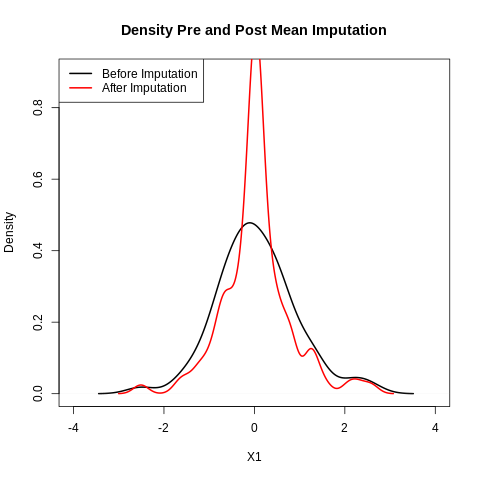

In [39]:
%%R
##### Density of x1 pre and post imputation #####
 
# Density of observed data
plot(density(data$x1[x1_miss_ind == FALSE]),
     xlim = c(- 4, 4),
     ylim = c(0, 0.9),
     lwd = 2, 
     main = "Density Pre and Post Mean Imputation",
     xlab = "X1")
 
# Density of observed & imputed data
points(density(data$x1), 
       lwd = 2, 
       type = "l", 
       col = "red")
 
# Legend
legend("topleft",
       c("Before Imputation", "After Imputation"),
       lty = 1,
       lwd = 2,
       col = c("black", "red"))

*Линейная регрессионная модель* оценивается на основе наблюдаемых значений целевой переменной Y и некоторых объясняющих переменных X.
Модель используется для прогнозирования значений отсутствующих случаев в Y. Затем отсутствующие значения Y заменяются на основе этих прогнозов.
Взаимосвязи X и Y (т.е. корреляции, коэффициенты регрессии и т.д.) сохраняются, поскольку замещенные значения основаны на регрессионных моделях. Это большое преимущество перед более простыми методами.

Регрессионный метод восстановления может быть классифицирован на: детерминированную и стохастическую регрессионную модели.

*Детерминированное регрессионное восстановление* заменяет недостающие значения точным предсказанием регрессионной модели. Случайная вариация (т.е. член ошибки) вокруг наклона регрессии не учитывается. Поэтому вмененные значения часто слишком точны и приводят к переоценке корреляции между X и Y.

*Стохастическое регрессионное восстановление* было разработано для того, чтобы решить указанную проблему. Стохастическая регрессионная интерполяция добавляет случайный член ошибки к предсказанному значению и поэтому способна более точно воспроизвести корреляцию X и Y.

In [ ]:
%%R

# Example data
 
set.seed(9090909) # Create reproducible data
N <- 2000 # Sample size
 
y <- round(rnorm(N, 20, 10))            # Dependent variable
x1 <- round(0.2 * y + rnorm(N, 5), 2)   # Predictor 1
x2 <- round(y * rpois(N, 5))            # Predictor 2
x3 <- round(0.01 * y + runif(N, 0, 10)) # Predictor 3
 
data <- data.frame(y, x1, x2, x3)
 
data$y[rbinom(N, 1, 0.2) == 1] <- NA # Aproximately 10% missings in y
head(data) # First 6 rows of our example data

   y    x1  x2 x3
1 13  8.47  52  5
2 26 11.29 182  0
3 26 12.20  78  8
4 18  9.31 198 10
5 NA 11.85  29  1
6 NA 11.44  72  5


In [ ]:
%%R
# Deterministic regression imputation
 
imp <- mice(data, method = "norm.predict", m = 1) # Impute data
data_det <- complete(imp) # Store data

# Stochastic regression imputation
 
imp <- mice(data, method = "norm.nob", m = 1) # Impute data
data_sto <- complete(imp) # Store data


 iter imp variable
  1   1  y
  2   1  y
  3   1  y
  4   1  y
  5   1  y

 iter imp variable
  1   1  y
  2   1  y
  3   1  y
  4   1  y
  5   1  y


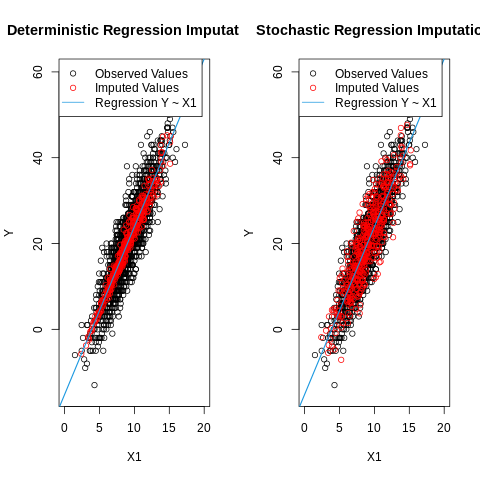

In [ ]:
%%R

# Graphical comparison of deterministic and stochastic regression imputation
 
par(mfrow = c(1, 2)) # Both plots in one graphic
 
# Deterministic regression imputation
plot(x1[!is.na(data$y)], data_det$y[!is.na(data$y)],     # Plot of observed values
     xlim = c(0, 20), ylim = c(- 15, 60),
     main = "Deterministic Regression Imputation",
     xlab = "X1", ylab = "Y")
points(x1[is.na(data$y)], data_det$y[is.na(data$y)],     # Plot of missing values
       col = "red")
abline(lm(y ~ x1, data_det), col = "#1b98e0", lwd = 1.5) # Regression slope
legend("topleft",                                        # Legend
       c("Observed Values", "Imputed Values", "Regression Y ~ X1"),
       pch = c(1, 1, NA),
       lty = c(NA, NA, 1),
       col = c("black", "red", "#1b98e0"))
 
# Stochastic regression imputation
plot(x1[!is.na(data$y)], data_sto$y[!is.na(data$y)],     # Plot of observed values
     xlim = c(0, 20), ylim = c(- 15, 60),
     main = "Stochastic Regression Imputation",
     xlab = "X1", ylab = "Y")
points(x1[is.na(data$y)], data_sto$y[is.na(data$y)],     # Plot of missing values
       col = "red")
abline(lm(y ~ x1, data_det), col = "#1b98e0", lwd = 1.5) # Regression slope
legend("topleft",                                        # Legend
       c("Observed Values", "Imputed Values", "Regression Y ~ X1"),
       pch = c(1, 1, NA),
       lty = c(NA, NA, 1),
       col = c("black", "red", "#1b98e0"))

In [ ]:
%%R

# Correlation between X1 and Y
 
print(round(cor(y, x1), 3)) # True correlation
 
print(round(cor(data_det$y, data_det$x1), 3)) # Correlation after deterministic regression imputation
 
print(round(cor(data_sto$y, data_sto$x1), 3)) # Correlation after stochastic regression imputation

[1] 0.897
[1] 0.912
[1] 0.892
